In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [108]:
df = pd.read_csv('Ames Housing Data Encoding Edited.csv')

In [109]:
df = df[['SalePrice','Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF','1st Flr SF', 'Gr Liv Area', 'Garage Area']]

In [110]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [111]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
from sklearn.linear_model import LassoCV

In [113]:
model = LassoCV()

In [114]:
model.fit(X_train, y_train)

LassoCV()

In [115]:
model.alpha_

0.0001128778288282451

In [116]:
y_pred = model.predict(X_test)

In [117]:
y_pred

array([5.14816771, 5.18437962, 5.07434585, 5.30330789, 5.3564137 ,
       5.11753676, 5.74740455, 5.08616341, 5.1401709 , 5.33179354,
       5.04103097, 5.26256323, 5.1450787 , 5.41749958, 5.64763418,
       5.12754471, 5.39349155, 5.34923116, 5.10758886, 5.59051821,
       5.15662679, 5.1313651 , 5.30115159, 5.33318222, 5.09856591,
       5.26506094, 5.09746808, 5.13169204, 5.17581578, 5.09776483,
       5.14410111, 5.31708903, 5.23036471, 5.29281482, 5.3083349 ,
       4.96214603, 5.19482911, 5.06139055, 5.2549336 , 5.12556416,
       5.22787892, 5.32133209, 5.07327426, 5.05340445, 5.43643816,
       5.10805839, 5.27783117, 5.5094822 , 5.18440602, 5.2042498 ,
       5.19438002, 5.39613536, 5.26458979, 5.30828225, 4.86580304,
       5.12731136, 5.09155071, 5.03252624, 5.27971081, 5.32355395,
       5.34553779, 5.30536222, 5.07107085, 5.36994342, 5.18914052,
       5.29460894, 5.05582829, 5.0022787 , 5.23241607, 4.90554858,
       5.29205832, 5.04134997, 5.5137923 , 5.26836033, 5.41571

In [118]:
y_test

221     5.212188
403     5.139564
1279    5.107210
487     5.394452
928     5.303196
          ...   
1779    5.319938
1046    5.281033
706     5.311754
1297    5.079181
265     5.328380
Name: SalePrice, Length: 853, dtype: float64

In [119]:
# 1. R-squared
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8284544362666244

In [120]:
# 2. RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [121]:
RMSE

0.07002066117336408

In [122]:
100*RMSE/df['SalePrice'].mean()

1.3420424792208603

In [123]:
# 3. Residual plot
test_pred = y_test - y_pred

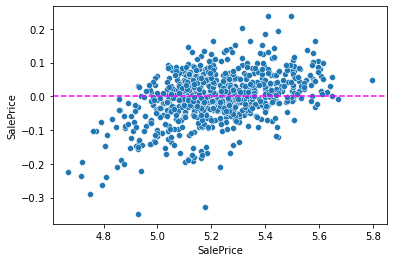

In [124]:
sns.scatterplot(x=y,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

**Predicting new model**

In [125]:
from joblib import dump, load

In [126]:
saleprice_model = load("Ames_Housing_model.h5")

In [127]:
saleprice_scaler = load("Ames_Housing_scaler.pkl")

In [128]:
df.head(2)

,SalePrice,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area
0,5.332438,1960,1960,112.0,1080.0,1656,1656,528.0
1,5.021189,1961,1961,0.0,882.0,896,896,730.0


In [129]:
saleprice_example = {'Year Built':1960,
                 'Year Remod/Add':1960,
                 'Mas Vnr Area':112.0,
                 'Total Bsmt SF':1080.0,
                 '1st Flr SF':1656,
                 'Gr Liv Area':1656,
                 'Garage Area':528.0}

In [130]:
saleprice_example.keys()

dict_keys(['Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area'])

**Sale Price API**

In [131]:
def return_prediction(model,scaler,sample_json):
    
    yr_blt = sample_json['Year Built']
    yr_remodadd = sample_json['Year Remod/Add']
    ms_vnr_area = sample_json['Mas Vnr Area']
    tot_bsmt_sf = sample_json['Total Bsmt SF']
    first_flr_sf = sample_json['1st Flr SF']
    gr_liv_area = sample_json['Gr Liv Area']
    grg_area = sample_json['Garage Area']
    
    sale_price = [[yr_blt,yr_remodadd,ms_vnr_area,tot_bsmt_sf, first_flr_sf,gr_liv_area,grg_area]]
    
    sale_price = scaler.transform(sale_price)
    
    prediction = model.predict(sale_price)**10
    
    return prediction[0]

In [132]:
return_prediction(saleprice_model,saleprice_scaler,saleprice_example)

14695902.532981478

**Evaluating API Predicted value with Actual value**

In [133]:
# Predicted - Actual
(return_prediction(saleprice_model,saleprice_scaler,saleprice_example))-215000

14480902.532981478

In [134]:
MSE

0.004902892991155056

In [ ]:
app = Flask(__name__)
@app.route('/')
def index():
    results = return_prediction(model=saleprice_model,scaler=saleprice_scaler,sample_json=saleprice_example)
    return f'<h1>{results}</h1>'

# REMEMBER TO LOAD THE MODEL AND THE SCALER!  
saleprice_model = load("Ames_Housing_model.h5")
saleprice_scaler = load("Ames_Housing_scaler.pkl")

saleprice_example = {'Year Built':1961,
                 'Year Remod/Add':1961,
                 'Mas Vnr Area':0.0,
                 'Total Bsmt SF':882.0,
                 '1st Flr SF':896,
                 'Gr Liv Area':896,
                 'Garage Area':730.0}

@app.route('/prediction', methods=['POST'])
def predict_saleprice():
    content = request.json
    
    results = return_prediction(model=saleprice_model,scaler=saleprice_scaler,sample_json=saleprice_example)
    
    return jsonify(results)

if __name__ == '__main__':
    app.run()

**My Flask App**

In [ ]:
from flask import Flask, jsonify
import numpy as np  
from joblib import dump, load

In [ ]:
app = Flask(__name__)
@app.route('/')
def index():
    return '<h1>Ames Housing Sale Price</h1>'

if __name__ == '__main__':
    app.run()

**Final App**

In [ ]:
from flask import Flask, render_template,  redirect, url_for, session
from flask_wtf import FlaskForm
from wtforms import TextField,SubmitField
from wtforms.validators import NumberRange
from joblib import dump, load


import numpy as np 

In [ ]:
def return_prediction(model,scaler,sample_json):
    
    yr_blt = sample_json['Year Built']
    yr_remodadd = sample_json['Year Remod/Add']
    ms_vnr_area = sample_json['Mas Vnr Area']
    tot_bsmt_sf = sample_json['Total Bsmt SF']
    first_flr_sf = sample_json['1st Flr SF']
    gr_liv_area = sample_json['Gr Liv Area']
    grg_area = sample_json['Garage Area']
    
    sale_price = [[yr_blt,yr_remodadd,ms_vnr_area,tot_bsmt_sf, first_flr_sf,gr_liv_area,grg_area]]
    
    sale_price = scaler.transform(sale_price)
    
    prediction = model.predict(sale_price)**10
    
    return prediction[0]

app = Flask(__name__)
# Configure a secret SECRET_KEY
# We will later learn much better ways to do this!!
app.config['SECRET_KEY'] = 'mysecretkey'


# REMEMBER TO LOAD THE MODEL AND THE SCALER!
saleprice_model = load("Ames_Housing_model.h5")
saleprice_scaler = load("Ames_Housing_scaler.pkl")

class SalePriceForm(FlaskForm):
    yr_blt = sample_json['Year Built']
    yr_remodadd = sample_json['Year Remod/Add']
    ms_vnr_area = sample_json['Mas Vnr Area']
    tot_bsmt_sf = sample_json['Total Bsmt SF']
    first_flr_sf = sample_json['1st Flr SF']
    gr_liv_area = sample_json['Gr Liv Area']
    grg_area = sample_json['Garage Area']
    
    submit = SubmitField('Analyze')
    
@app.route('/', methods=['GET', 'POST'])
def index():

    # Create instance of the form.
    form = SalePriceForm()
    
    if form.validate_on_submit():
        session['yr_blt'] = form.yr_blt.data
        session['yr_remodadd'] = form.yr_remodadd.data
        session['ms_vnr_area'] = form.ms_vnr_area.data
        session['tot_bsmt_sf'] = form.tot_bsmt_sf.data
        session['first_flr_sf'] = form.first_flr_sf.data
        session['gr_liv_area'] = form.ms_vnr_area.data
        session['grg_area'] = form.grg_area.data
        
        return redirect(url_for("prediction"))
    
    return render_template('home.html', form=form)

@app.route('/prediction')
def prediction():

    content = {}
    
    content['Year Built'] = float(session['yr_bltn'])
    content['Year Remod/Add'] = float(session['yr_remodadd'])
    content['Mas Vnr Area'] = float(session['ms_vnr_area'])
    content['Total Bsmt SF'] = float(session['tot_bsmt_sf'])
    content['1st Flr SF'] = float(session['first_flr_s'])
    content['Gr Liv Area'] = float(session['gr_liv_area'])
    content['Garage Area'] = float(session['grg_area'])
    
    results = return_prediction(model=saleprice_model,scaler=saleprice_scaler,sample_json=saleprice_example)
    
    return render_template('prediction.html',results=results)

if __name__ == '__main__':
    app.run(debug=True)